In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Our Dataset

In [137]:
df = pd.read_excel('data2.xlsx')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EMITEN                   52 non-null     object 
 1   PER (X)                  52 non-null     float64
 2   PBV (X)                  52 non-null     float64
 3   EV/EBTIDA (X)            52 non-null     float64
 4   BVPS                     52 non-null     float64
 5   ROA                      52 non-null     float64
 6   ROE                      52 non-null     float64
 7   DER (X)                  52 non-null     float64
 8   Sales Growth             52 non-null     float64
 9   Operating Income Growth  52 non-null     float64
 10  Net Income Growth        52 non-null     float64
 11  Gross Profit Margin      52 non-null     float64
 12  Operating Profit Margin  52 non-null     float64
 13  Net Profit Margin        52 non-null     float64
 14  Total Sales              52 

In [109]:
df.describe()

,PER (X),PBV (X),EV/EBTIDA (X),BVPS,ROA,ROE,DER (X),Sales Growth,Operating Income Growth,Net Income Growth,...,Long Term Debt,Minority Interest,Total Liabilities,Total Equity,EPS,Outstanding Shares,Cash From Operating Act,Cash From Investing Act,Cash From Financing Act,Category
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,5.200000e+01,4.100000e+01,5.200000e+01,5.200000e+01,52.000000,52.000000,5.200000e+01,5.200000e+01,5.000000e+01,0.0
mean,23.129615,3.254038,12.646731,3057.549423,2.207885,0.315192,1.652500,-13.754038,-44.238269,-390.464808,...,1.305760e+07,4.339856e+06,4.771799e+07,2.475326e+07,234.222115,17486.403846,6.240462e+06,-4.685848e+06,-1.922638e+06,NaN
std,45.465127,7.999508,29.381123,5364.235061,15.668435,37.173107,2.154349,28.347578,237.731273,2168.226351,...,2.008624e+07,9.283808e+06,1.772887e+08,4.248954e+07,634.920223,27022.323440,1.377851e+07,1.765328e+07,8.685794e+06,NaN
min,-60.350000,0.120000,-68.710000,6.500000,-88.450000,-140.130000,0.020000,-93.950000,-1577.920000,-15358.190000,...,3.200000e+02,-1.486600e+04,1.818000e+03,1.378100e+04,-543.580000,206.000000,-8.355870e+05,-1.160078e+08,-2.795500e+07,NaN
25%,4.047500,0.797500,6.345000,364.600000,0.505000,1.127500,0.415000,-27.710000,-45.205000,-78.215000,...,3.627830e+05,5.148000e+03,1.782152e+06,2.399391e+06,3.947500,2266.250000,1.681858e+05,-1.441560e+06,-3.542257e+06,NaN
50%,13.540000,1.300000,9.330000,1220.805000,4.080000,5.260000,1.035000,-11.520000,-20.050000,-25.675000,...,2.833612e+06,2.586170e+05,6.539200e+06,7.245738e+06,54.050000,6119.000000,1.341656e+06,-3.576365e+05,-2.575530e+05,NaN
75%,28.502500,2.627500,18.427500,3280.862500,6.955000,11.382500,1.727500,1.512500,-1.427500,12.785000,...,1.474715e+07,2.860757e+06,3.486825e+07,2.600023e+07,160.372500,20631.750000,6.200172e+06,-1.208150e+04,8.531500e+03,NaN
max,200.780000,56.790000,147.990000,30415.690000,44.840000,145.090000,10.670000,100.140000,489.530000,492.900000,...,7.008569e+07,3.979200e+07,1.278346e+09,1.999114e+08,3974.730000,123346.000000,6.668919e+07,1.313300e+07,2.728551e+07,NaN


In [139]:
df = df[['DER (X)','Net Income','Category']]
df.describe()

,DER (X),Net Income,Category
count,52.000000,5.200000e+01,0.0
mean,1.652500,1.864803e+06,NaN
std,2.154349,4.787885e+06,NaN
min,0.020000,-7.378554e+06,NaN
25%,0.415000,2.760700e+04,NaN
50%,1.035000,3.368380e+05,NaN
75%,1.727500,1.287319e+06,NaN
max,10.670000,2.080400e+07,NaN


## Standarisasi Fitur

In [146]:
feats = ['DER (X)','Net Income']
X = df[feats].values
y = df['Category'].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.describe()

,DER (X),Net Income
count,5.200000e+01,5.200000e+01
mean,7.472655e-17,5.124106e-17
std,1.009756e+00,1.009756e+00
min,-7.651626e-01,-1.949407e+00
25%,-5.800237e-01,-3.874613e-01
50%,-2.894260e-01,-3.222450e-01
75%,3.515295e-02,-1.217904e-01
max,4.226557e+00,3.994242e+00


### Lakukan K-means

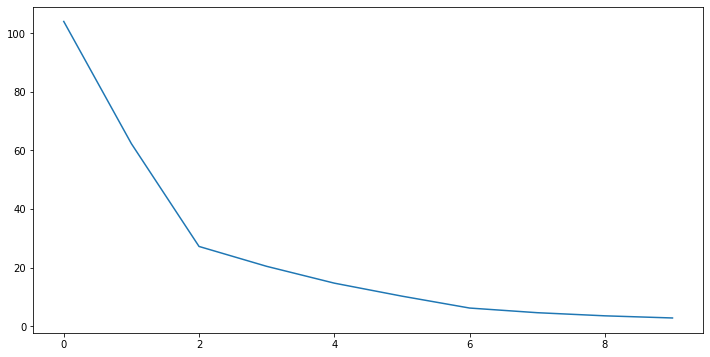

In [147]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(new_df.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(inertia) #Elbow Method

Ternyata clustering paling optimal di n cluster (n_cluster = n)

In [148]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(new_df.values)

KMeans(n_clusters=5, random_state=0)

In [149]:
new_df['target'] = y
new_df['fit'] = kmeans.labels_

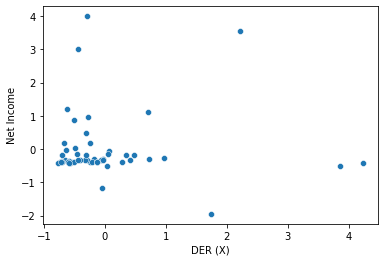

In [150]:
sns.scatterplot(x='DER (X)', y='Net Income', hue=new_df.target.to_list(), data=new_df);
#sns.scatterplot(data=new_df, x='berat', y='tinggi', hue='target')

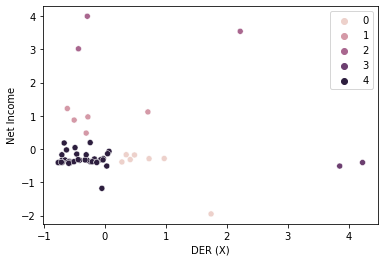

In [151]:
sns.scatterplot(x='DER (X)', y='Net Income', hue=new_df.fit.to_list(), data=new_df);
#sns.scatterplot(data=new_df, x='berat', y='tinggi', hue='fit')

Clustering ini sangat sering dipakai untuk membuat segmentasi user/buyer khususnya di e-commerce

External Evaluation: Purity.<br>
Purity makin mendekati 1 maka semakin baik

In [ ]:
inverse_transform